In [2]:
%load_ext autoreload
%autoreload 2

In [22]:
conv.outputShape

(5, 5, 1)

In [14]:
from NeuralNetwork import NeuralNetwork
from Layers import Dense, Conv, Reshape, sigmoid
from tests import *
from LayerTests.Convolutional import computeLocalGradient
from LayerTests.Convolutional import *
import matplotlib.pyplot as plt

conv = Conv((5,5),1,2,(2,2),sigmoid,inputShape=(10,10,1))
conv.allocateMemory(1)
ym1 = Tensor(np.arange(100).reshape(conv.batchSize,*conv.inputShape))
sigmaOut = Tensor((conv.batchSize,*conv.outputShape))
print(conv.inputShape)


i1 = 4
j1 = 0

output = runCPUKernel(forwardPropagate,conv.GPUForwardPropagate,(ym1,),ind=[0,0,i1*5+j1])
ym1, v, w, b = output[0],output[-3],output[-2],output[-1] 
print(v.accessed.squeeze())
print(ym1.accessed.squeeze())



output = runCPUKernel(computeLocalGradient,conv.computeLocalGradient,(sigmaOut,))
#output[0].array[np.logical_not(output[0].accessed)] = 0
#print(output[0].array.squeeze())



(10, 10, 1)
[[False False False False  True]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]
[[False False False False False False  True  True  True  True]
 [False False False False False False  True  True  True  True]
 [False False False False False False  True  True  True  True]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]


In [15]:
from NeuralNetwork import NeuralNetwork
from Layers import Dense, Conv, Reshape, sigmoid
from tests import *
from LayerTests.Convolutional import *
import matplotlib.pyplot as plt
from tests import gradientTest
model = NeuralNetwork([Conv((5,5),6,2,(2,2),sigmoid,inputShape=(10,10,1)),
                        #Conv((3,3),6,0,(1,1),sigmoid),
                        Conv((2,2),6,0,(2,2),sigmoid), # GRADIENT LOCALS NOT WORKING PROPPERLY
                        Reshape(-1), 
                        Dense(3,sigmoid)])

dw,db,plotter = gradientTest(model)
model

FAILED Layer 0 dw r2= 0.67, m= 2.91, b= -0.0,
FAILED Layer 0 db r2= 0.88, m= 3.39, b= 0.0,
PASSED Layer 1 dw r2= 1.0, m= 3.04, b= 0.0,
PASSED Layer 1 db r2= 1.0, m= 3.05, b= 0.0,
PASSED Layer 3 dw r2= 1.0, m= 3.08, b= -0.0,
PASSED Layer 3 db r2= 1.0, m= 3.11, b= -0.0,


		 MODEL SUMMARY: 
Input: 		 (10, 10, 1)
Conv Layer: 		(5, 5, 6)
Conv Layer: 		(2, 2, 6)
Reshape Layer: 		(24,)
Dense Layer: 		(3,)

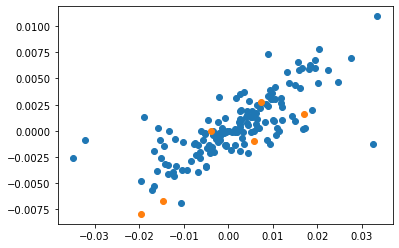

In [7]:
plotter(0)

In [3]:
from NeuralNetwork import NeuralNetwork
from Layers import Dense, Conv, Reshape, sigmoid
from tests import *
from LayerTests.Convolutional import *
import matplotlib.pyplot as plt
from tests import gradientTest
model = NeuralNetwork([Conv((5,5),6,2,(2,2),sigmoid,inputShape=(10,10,1)),
                        #Conv((3,3),6,0,(1,1),sigmoid),
                        Conv((2,2),6,0,(2,2),sigmoid),
                        Reshape(-1), 
                        Dense(3,sigmoid)])
model.allocateMemory(1)

0.54297835
PASSED forwardPropagate
PASSED sigmoidTest
PASSED computedb
PASSED computeGradients
PASSED computeLocalGradient
1.0
1.0
1.0
1.0
1.0
1.0
FAILED learningRule
Param Index 6 with name "w" was off by 9.701629638671875
Param Index 7 with name "b" was off by 8.960834503173828

-42.398045


In [16]:
from NeuralNetwork import NeuralNetwork
from Layers import Dense, Conv, Reshape, sigmoid
from tests import *
from LayerTests.Convolutional import *
import matplotlib.pyplot as plt
from tests import gradientTest
model = NeuralNetwork([Conv((5,5),6,2,(2,2),sigmoid,inputShape=(10,10,1)),
                        #Conv((3,3),6,0,(1,1),sigmoid),
                        Conv((2,2),6,0,(2,2),sigmoid),
                        Reshape(-1), 
                        Dense(3,sigmoid)])

dw,db,plotter = gradientTest(model)
model

FAILED Layer 0 dw r2= 0.57, m= 3.04, b= 0.0,
FAILED Layer 0 db r2= 0.89, m= 5.5, b= 0.0,
PASSED Layer 1 dw r2= 1.0, m= 2.98, b= -0.0,
PASSED Layer 1 db r2= 1.0, m= 2.99, b= -0.0,
PASSED Layer 3 dw r2= 1.0, m= 2.9, b= 0.0,
PASSED Layer 3 db r2= 1.0, m= 2.9, b= -0.0,


		 MODEL SUMMARY: 
Input: 		 (10, 10, 1)
Conv Layer: 		(5, 5, 6)
Conv Layer: 		(2, 2, 6)
Reshape Layer: 		(24,)
Dense Layer: 		(3,)

In [3]:
from tests import *
from LayerTests.Convolutional import *
batchSize = 10
conv = Conv((5,5),3,1,(2,2),sigmoid, inputShape=(10,10,1))
conv.allocateMemory(batchSize)
ym1 = Tensor(np.random.randn(batchSize,*conv.inputShape))
sigmaOut = Tensor(np.random.randn(batchSize,*conv.outputShape))



PASSED forwardPropagate
PASSED sigmoidTest
PASSED computedb
PASSED computeGradients
PASSED computeLocalGradient
FAILED learningRule
Param Index 6 with name "w" was off by 4.580564975738525
Param Index 7 with name "b" was off by 0.7990346550941467



In [9]:
sigmaOut.shape

(10, 8, 8, 2)

In [8]:
sigmaOut.get()[:,:,1]

array([[[0., 0.],
        [1., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.],
        [7., 7.]],

       [[7., 7.],
        [8., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.],
        [7., 7.]],

       [[7., 7.],
        [8., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.],
        [7., 7.]],

       [[7., 7.],
        [8., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.],
        [7., 7.]],

       [[7., 7.],
        [8., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.],
        [7., 7.]],

       [[7., 7.],
        [8., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.],
        [7., 7.]],

       [[7., 7.],
        [8., 1.],
        [2., 2.],
        [3., 3.],
        [4., 4.],
        [5., 5.],
        [6., 6.]

In [2]:
print(out2['not accesed ym1'][0,:,:,0])

NameError: name 'out2' is not defined